## Разложение ошибки на смещение и разброс. Кросс-валидация.

### Разложение ошибки

Метод наименьших квадратов

Полное описание: https://habr.com/ru/company/ods/blog/323890/

Рассказ про линейные модели мы начнем с линейной регрессии. В первую очередь, необходимо задать модель зависимости объясняемой переменной y от объясняющих ее факторов, функция зависимости будет линейной:

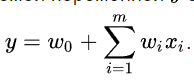

Если мы добавим фиктивную размерность x_0 = 1 для каждого наблюдения, тогда линейную форму можно переписать чуть более компактно, записав свободный член w_0 под сумму:

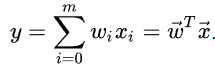

Если рассматривать матрицу наблюдения-признаки, у которой в строках находятся примеры из набора данных, то нам необходимо добавить единичную колонку слева. Зададим модель следующим образом:

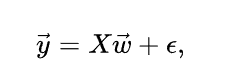

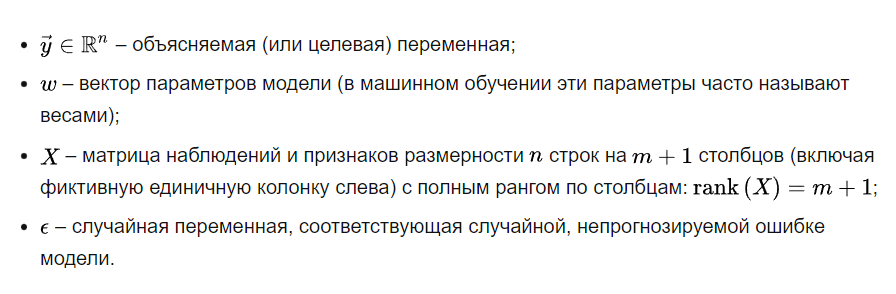

Один из способов вычислить значения параметров модели является метод наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью:

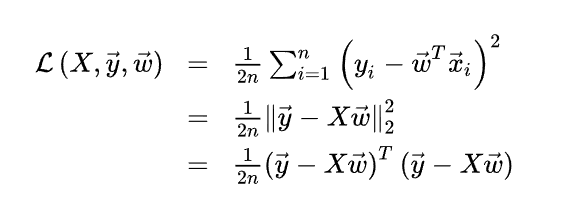

Итак, имея в виду все определения и условия описанные выше, мы можем утверждать, опираясь на теорему Маркова-Гаусса, что оценка МНК является лучшей оценкой параметров модели, среди всех линейных и несмещенных оценок, то есть обладающей наименьшей дисперсией.

Метод максимального правдоподобия

Вполне резонно могли возникнуть вопросы: например, почему мы минимизируем среднеквадратичную ошибку, а не что-то другое. Ведь можно минимизировать среднее абсолютное значение невязки или еще что-то. Единственное, что произойдёт в случае изменения минимизируемого значения, так это то, что мы выйдем из условий теоремы Маркова-Гаусса, и наши оценки перестанут быть лучшими среди линейных и несмещенных.

будем теперь считать, что случайные ошибки берутся из центрированного нормального распределения:

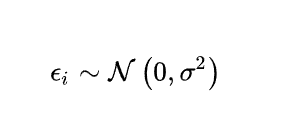

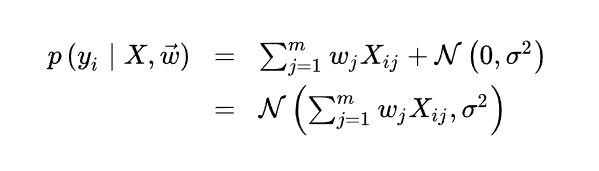

Так как примеры берутся независимо (ошибки не скоррелированы – одно из условий теоремы Маркова-Гаусса), то полное правдоподобие данных будет выглядеть как произведение функций плотности p(y_i). Рассмотрим логарифм правдоподобия, что позволит нам перейти от произведения к сумме:

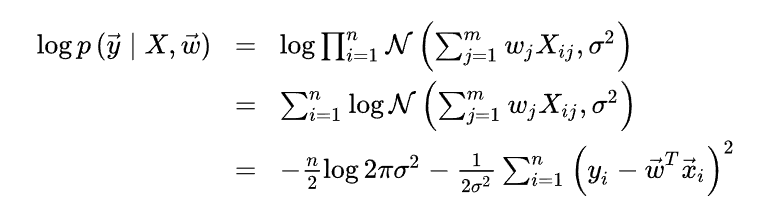

Мы хотим найти гипотезу максимального правдоподобия, т.е. нам нужно максимизировать выражение 

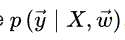

а это то же самое, что и максимизация его логарифма. Обратите внимание, что при максимизации функции по какому-то параметру можно выкинуть все члены, не зависящие от этого параметра:

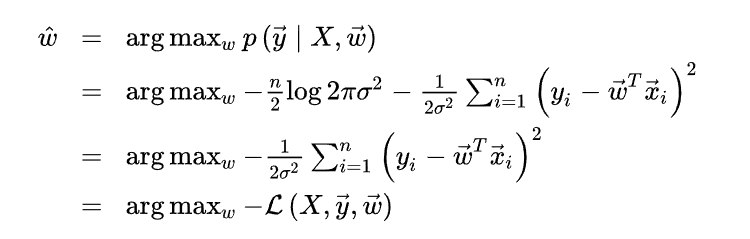

Таким образом, мы увидели, что максимизация правдоподобия данных – это то же самое, что и минимизация среднеквадратичной ошибки (при справедливости указанных выше предположений). Получается, что именно такая функция стоимости является следствием того, что ошибка распределена нормально, а не как-то по-другому.

Поговорим немного о свойствах ошибки прогноза линейной регрессии (в принципе эти рассуждения верны для всех алгоритмов машинного обучения). В свете предыдущего пункта мы выяснили, что:

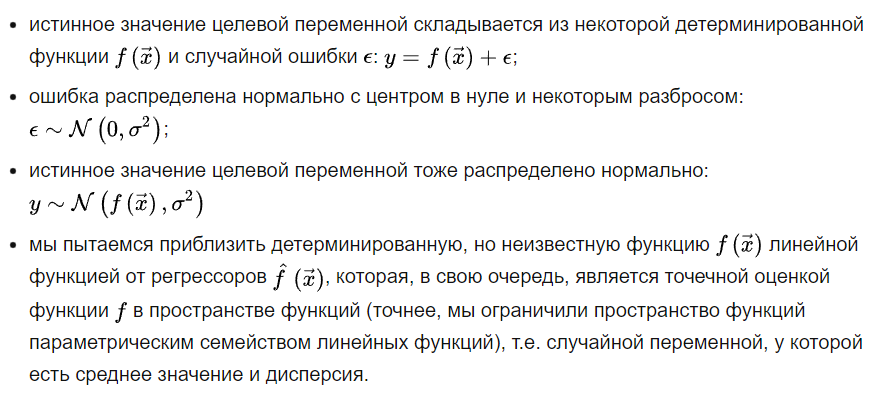

Тогда ошибка в точке раскладывается следующим образом:

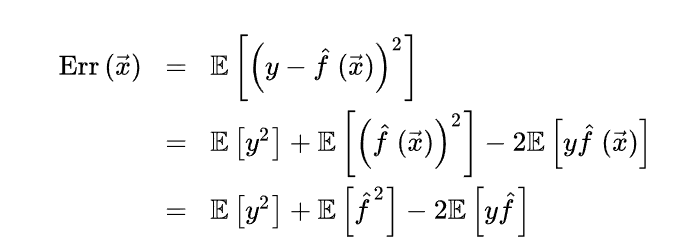

Рассмотрим каждый член в отдельности, первые два расписываются легко по формуле

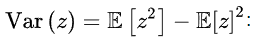

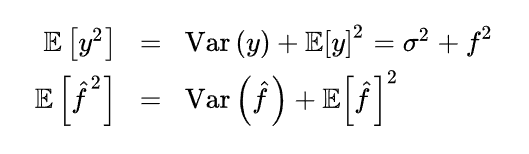

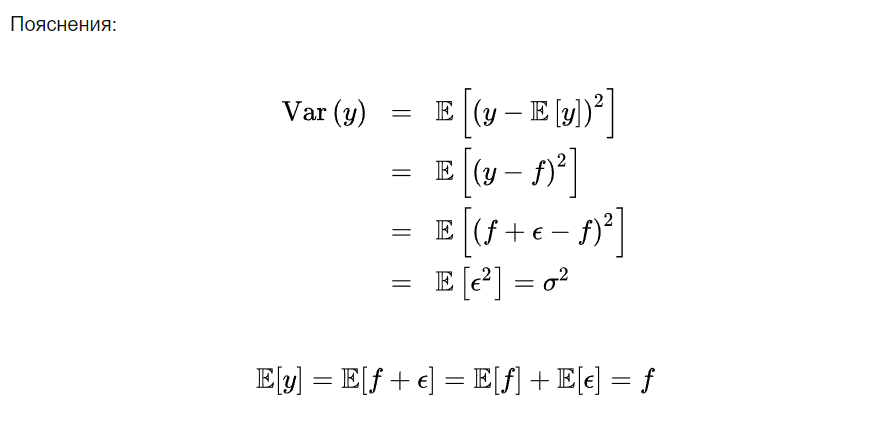

И теперь последний член суммы. Мы помним, что ошибка и целевая переменная независимы друг от друга:

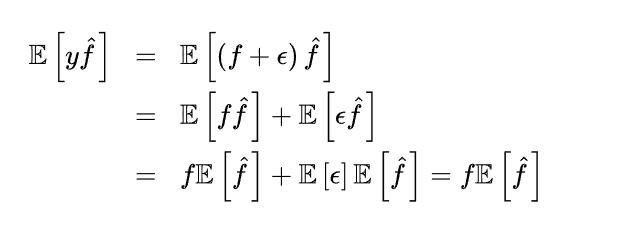

Наконец, собираем все вместе:

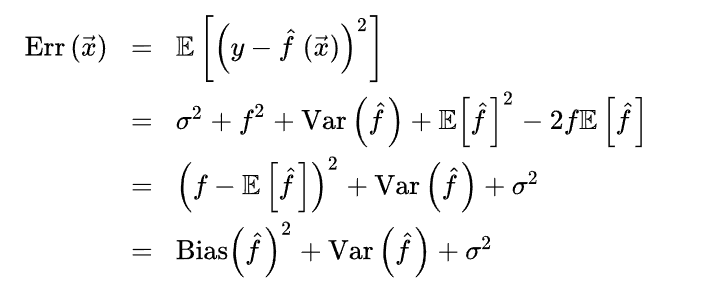

Итак, мы достигли цели всех вычислений, описанных выше, последняя формула говорит нам, что ошибка прогноза линейной модели складывается из:

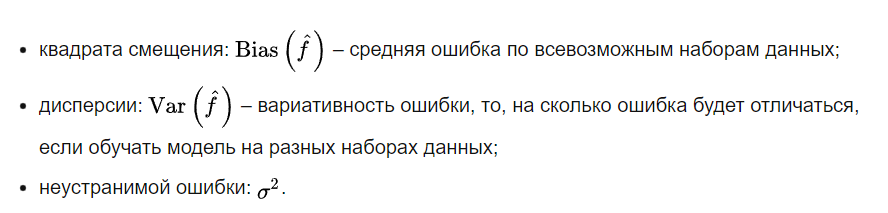

Если с последней мы ничего сделать не можем, то на первые два слагаемых мы можем как-то влиять. В идеале, конечно же, хотелось бы свести на нет оба этих слагаемых (левый верхний квадрат рисунка), но на практике часто приходится балансировать между смещенными и нестабильными оценками (высокая дисперсия).

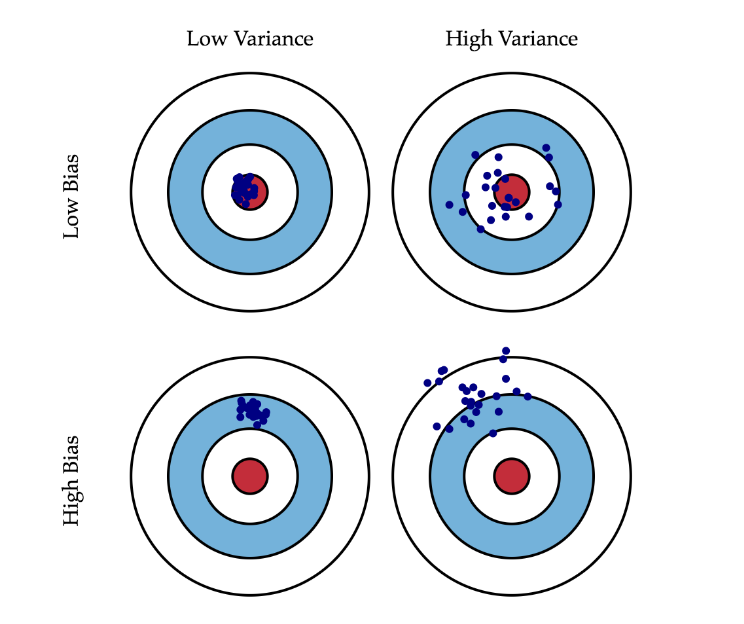

Как правило, при увеличении сложности модели (например, при увеличении количества свободных параметров) увеличивается дисперсия (разброс) оценки, но уменьшается смещение. Из-за того что тренировочный набор данных полностью запоминается вместо обобщения, небольшие изменения приводят к неожиданным результатам (переобучение). Если же модель слабая, то она не в состоянии выучить закономерность, в результате выучивается что-то другое, смещенное относительно правильного решения.

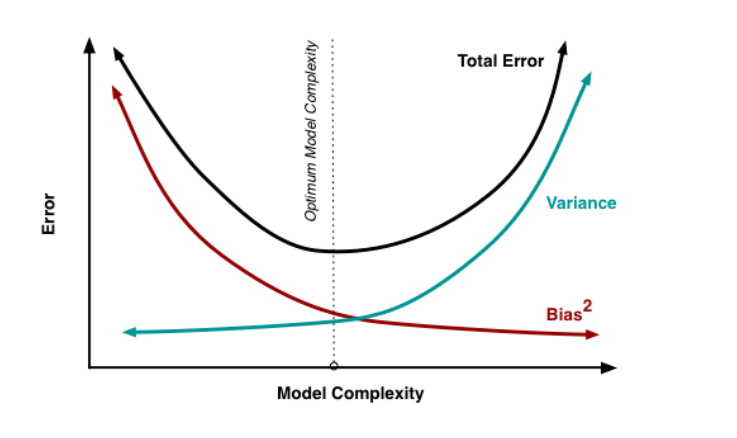

Теорема Маркова-Гаусса как раз утверждает, что МНК-оценка параметров линейной модели является самой лучшей в классе несмещенных линейных оценок, то есть с наименьшей дисперсией. Это значит, что если существует какая-либо другая несмещенная модель g тоже из класса линейных моделей, то мы можем быть уверены, что 

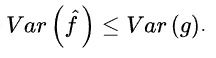

### Кросс-валидация

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.

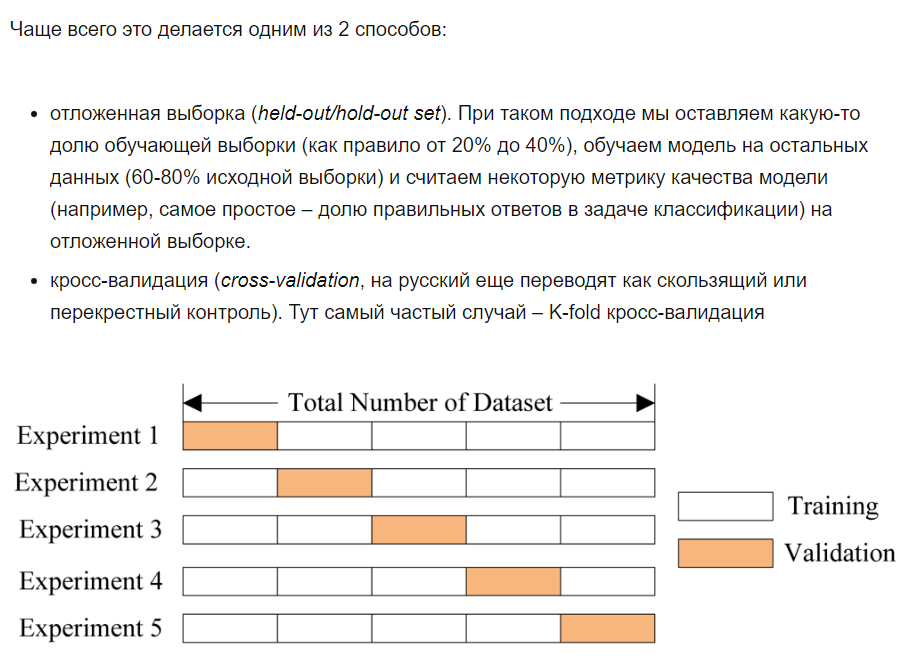

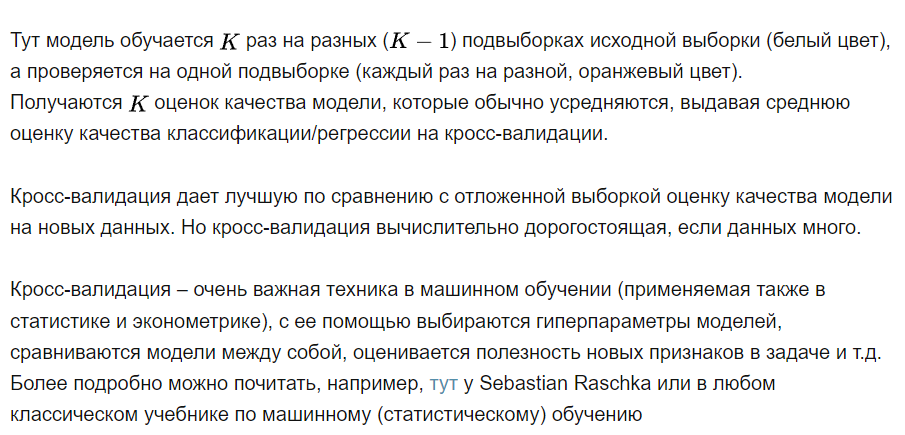

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_score

X, y = datasets.load_iris(return_X_y=True)
print(X.shape, y.shape)

clf = svm.SVC(kernel='linear')
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

(150, 4) (150,)
[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02


### Проверочные вопросы

1. Каким образом можно вычислить параметры линейной модели?
2. Почему минимизируют среднеквадратичную ошибку?
3. Из чего складывается ошибка?
4. Что такое кросс-валидация?